# Are Mrs. Lakshmi Sankaran's articles unique and original? 

#### The main objective of this exercise is to determine if Mrs. Lakshmi Sankaran's articles are monotonous or are they unique and original. 


## Process
#### 1.Text preprocessing
#### 1.1 Tokenization
#### 1.2 Stemming/ Lemmatization
#### 1.3 Remove stopwords
#### 2. Vectorize the text
#### 3. Compare the texts using cosine similarity








In [58]:
#Importing libraries

#For word pre processing
import nltk
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd

#For finding similarity
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#For visualising the similarity
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
#Importing the text and creating the corpus

with open('SearchingForOurPopCultureGods.txt', 'r', encoding = 'utf-8') as file:
    article1 = file.read()

with open('aCitysStateOfMind.txt', 'r', encoding = 'utf-8') as file:
    article2 = file.read()
    
with open('howDeepIsYourTravelLove.txt', 'r', encoding = 'utf-8') as file:
    article3 = file.read()
    



In [49]:
#Let us create a function to perform pre processing which takes the article as an input

#Before this we define a function to map POS tags to WordNet POS tags so that it can be used for lemmatization

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def preProcess(article):
    #First we perform tokenization
    tokens = word_tokenize(article)
    
    #Remove punctuations(?)
    
    tokens = [token for token in tokens if token.isalnum()]
    #return tokens
    #Then we perform POS tagging which will help in lemmatization
    tagged = nltk.pos_tag(tokens)
    #return tagged
    lemmatizer = WordNetLemmatizer()
    #Next we perform lemmatization
    
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(tag)) for token, tag in tagged]
    #return(lemmatized_tokens)
    #Removing stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if not token.lower() in stop_words]
    return ' '.join(filtered_tokens)

    






In [63]:
#Now we apply the functions
cleaned1 = preProcess(article1)
cleaned2 = preProcess(article2)
cleaned3 = preProcess(article3)

docList = [cleaned1, cleaned2, cleaned3]
#vect = TfidfVectorizer(binary=True)
vectorizer = TfidfVectorizer(binary=True).fit_transform(docList)
tokens = vectorizer.toarray()
cos_sim = cosine_similarity(tokens)
print(cos_sim)


[[1.         0.05382649 0.03945607]
 [0.05382649 1.         0.06055612]
 [0.03945607 0.06055612 1.        ]]


<AxesSubplot:>

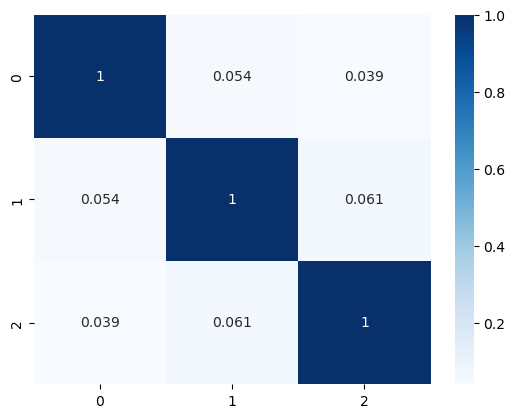

In [64]:
sns.heatmap(cos_sim, annot=True, cmap='Blues')

In [65]:
# Finding Jaccard similarity

t1 = set(word_tokenize(cleaned1))
t2 = set(word_tokenize(cleaned2))
t3 = set(word_tokenize(cleaned3))


similarity = len(t1.intersection(t2)) / len(t1.union(t2))
print("Jaccard similarity between the the text1 and text2 is: {:.2f}".format(similarity))

similarity2 = len(t2.intersection(t3)) / len(t2.union(t3))
print("Jaccard similarity between the the text2 and text3 is: {:.2f}".format(similarity2))

similarity3 = len(t1.intersection(t3)) / len(t1.union(t3))
print("Jaccard similarity between the the text1 and text3 is: {:.2f}".format(similarity3))

Jaccard similarity between the the text1 and text2 is: 0.04
Jaccard similarity between the the text2 and text3 is: 0.05
Jaccard similarity between the the text1 and text3 is: 0.04


## Conclusion


From the above information we can deduce that Jaccard similarity will be more suited for our purpose as we are comparing the uniqueness of two texts. We can see that the similarity between the texts is around 4% which is pretty less. 
Therefore, from looking at the three articles we may conclude that laxmi Sankaran's articles are not monotonous.



